<a href="https://colab.research.google.com/github/Dhiraj-jadhav04/Prodigy_DS_04/blob/main/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/twitter_training.csv')

In [7]:
df_f = pd.read_csv('/content/twitter_validation.csv')

In [8]:
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
df.tail()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [10]:
df_f.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [14]:
df.describe()

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [15]:
df.columns = ["id","margins","sentiment","text"]

In [16]:
df_f.columns = ["id","margins","sentiment","text"]

In [17]:
df.head()

,id,margins,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [18]:
id_types = df['id'].value_counts()

In [19]:
id_types

id
352     1
6890    1
364     1
2567    1
7780    1
       ..
8955    1
1565    1
3361    1
8408    1
6960    1
Name: count, Length: 999, dtype: int64

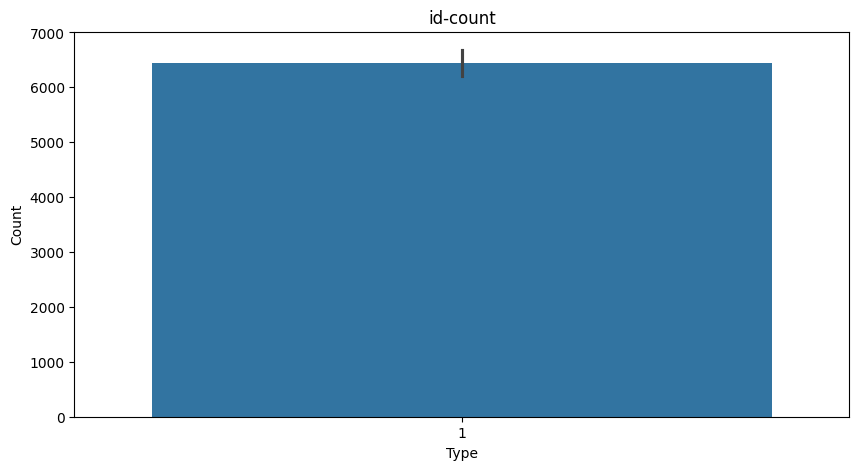

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('id-count')
plt.show()

In [22]:
margins_t = df['margins'].value_counts()
margins_t

margins
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                           

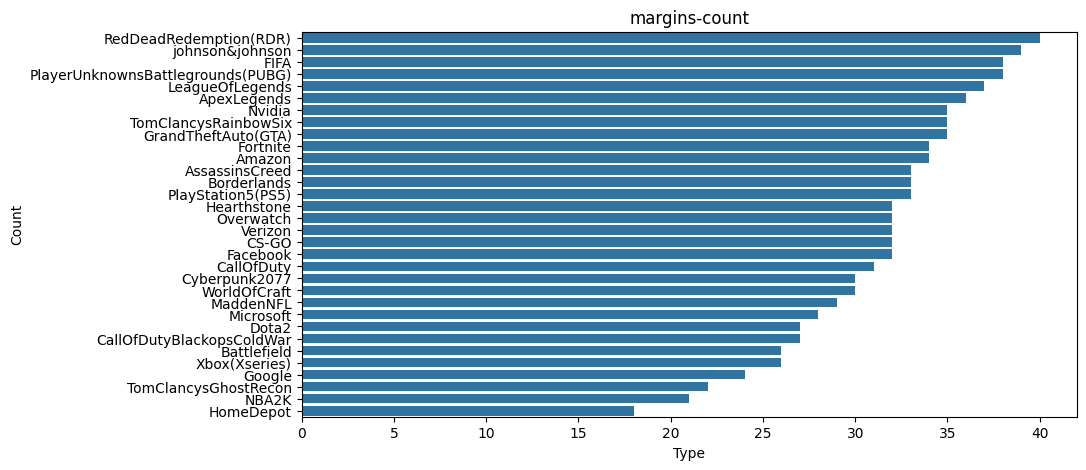

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y=margins_t.index, x=margins_t.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('margins-count')
plt.show()

In [24]:
sentiment_V = df['sentiment'].value_counts()

In [25]:
sentiment_V

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

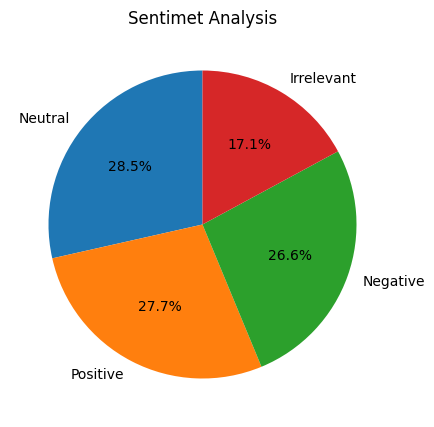

In [26]:
plt.figure(figsize=(5, 5))
plt.pie(sentiment_V, labels=sentiment_V.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Sentimet Analysis')

In [27]:
T0=df[df['sentiment']=="Negative"]
T1=df[df['sentiment']=="Positive"]
T2=df[df['sentiment']=="Irrelevant"]
T3=df[df['sentiment']=="Neutral"]

In [28]:
df=pd.concat([T0,T1,T2,T3],axis=0)
df

,id,margins,sentiment,text
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
11,11783,Verizon,Negative,"@FredTJoseph hey fred, Comcast cut the cable a..."
...,...,...,...,...
976,4444,Google,Neutral,This is....odd. @Google suggests the most dead...
984,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\n“Oh ...
987,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
990,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...


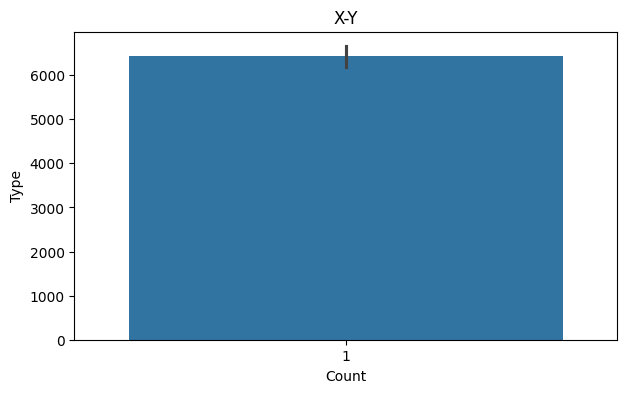

In [29]:
plt.figure(figsize=(7,4))
sns.barplot(x=id_types.values, y=id_types.index)
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('X-Y')
plt.show()

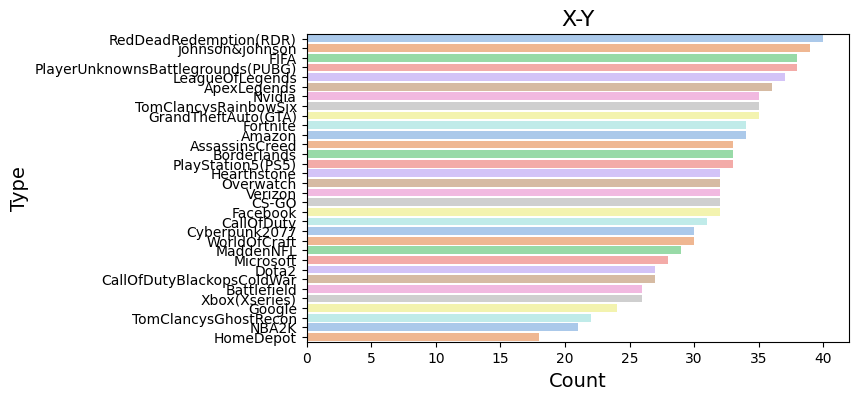

In [30]:
plt.figure(figsize=(7, 4))
sns.barplot(x=margins_t.values, y=margins_t.index, palette="pastel")
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.title('X-Y', fontsize=16)
plt.show()

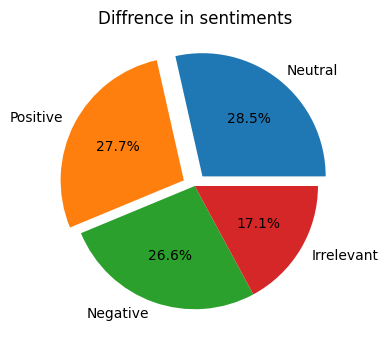

In [31]:
plt.figure(figsize=(7,4))
plt.pie(x=sentiment_V.values, labels=sentiment_V.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('Diffrence in sentiments')
plt.show()

In [32]:

df

,id,margins,sentiment,text
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
11,11783,Verizon,Negative,"@FredTJoseph hey fred, Comcast cut the cable a..."
...,...,...,...,...
976,4444,Google,Neutral,This is....odd. @Google suggests the most dead...
984,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\n“Oh ...
987,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
990,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...


In [33]:
from wordcloud import WordCloud

NameError: name 'positive' is not defined

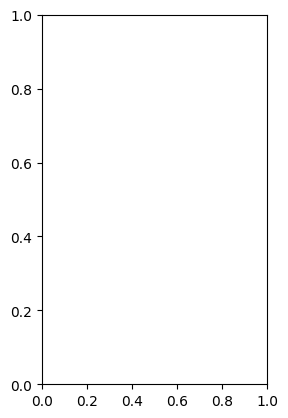

In [34]:
plt.subplot(1, 2, 1)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

NameError: name 'negative_text' is not defined

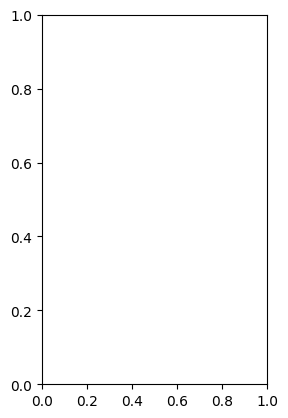

In [35]:
plt.subplot(1, 2, 2)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

In [36]:
plt.show()

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:
df['sentiment']=label_encoder.fit_transform(df['sentiment'])
df['margins']=label_encoder.fit_transform(df['margins'])
df_f['sentiment']=label_encoder.fit_transform(df_f['sentiment'])
df_f['margins']=label_encoder.fit_transform(df_f['margins'])

In [39]:
df = df.drop(['id'],axis=1)
df

,margins,sentiment,text
1,19,1,@Microsoft Why do I pay for WORD when it funct...
2,5,1,"CSGO matchmaking is so full of closet hacking,..."
4,10,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
8,6,1,FIX IT JESUS ! Please FIX IT ! What In the wor...
11,28,1,"@FredTJoseph hey fred, Comcast cut the cable a..."
...,...,...,...
976,13,2,This is....odd. @Google suggests the most dead...
984,25,2,@6th__man playing red dead redemption-\n\n“Oh ...
987,17,2,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
990,6,2,Late night stream with the boys! Come watch so...


In [40]:
df.nunique()
df_f.nunique()

id           999
margins       32
sentiment      4
text         998
dtype: int64